In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# K-Means Clustering modeli ile müşteri segmentasyonu yaparız.

In [ ]:
# Annual Income : müşterinin yıllık geliri 
# Spending Score : müşterinin harcama skoru

In [2]:
df = pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [3]:
df.rename(columns = {'Annual Income (k$)':'income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'score'}, inplace = True)

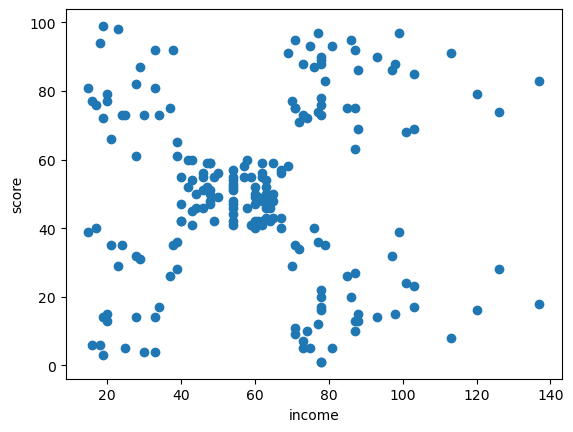

In [4]:
# Dataset
plt.scatter(df['income'], df['score'])
plt.xlabel('income')
plt.ylabel('score')
plt.show()

In [5]:
# Normalization
scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [6]:
k_range = range(1,11)
list_dist = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['income','score']])
    list_dist.append(kmeans.inertia_)

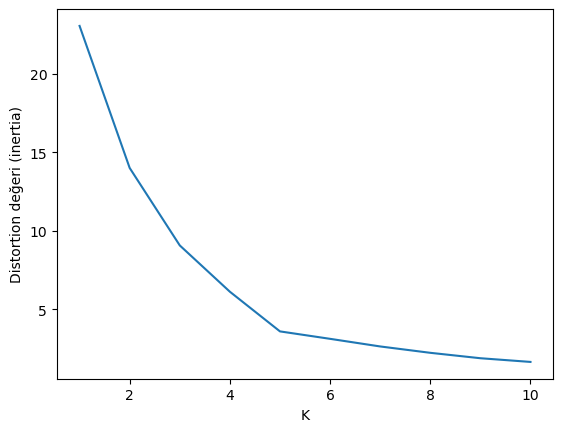

In [7]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [ ]:
# k değerini 5 seçeriz.

In [8]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df[['income','score']])

KMeans(n_clusters=5)

In [9]:
labels = kmeans.labels_
labels

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

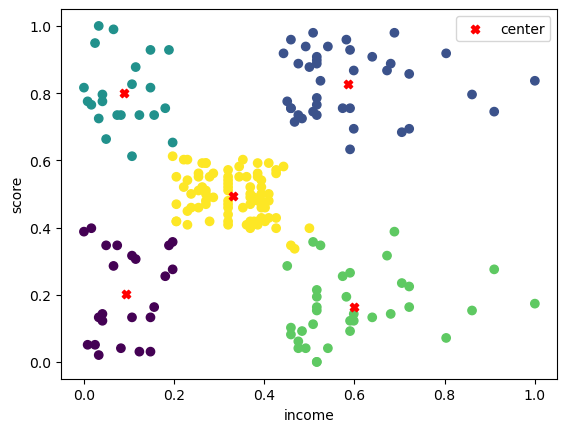

In [10]:
plt.figure()
plt.scatter(df["income"], df["score"] , c = labels , cmap = "viridis")   # her bir kümeyi çizdirir

plt.xlabel('income')
plt.ylabel('score')

centers = kmeans.cluster_centers_    # her bir kümenin merkezi
plt.scatter(centers[:,0], centers[:,1] , c = "red" , marker = "X" , label = "center")
plt.legend()
plt.show()